# Assignment 5 - ML for marketing

## Juliana Sánchez Ramírez

Neural network for Company Bankruptcy Prediction

In [9]:
library(nnet)          # class.ind() function
library(neuralnet)     # Deep Neural Networks
library(pROC)

Warning message:
"package 'pROC' was built under R version 3.6.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [2]:
data = read.csv('data/bankruptcy_prediction/data.csv')

In [3]:
head(data)

Bankrupt.,ROA.C..before.interest.and.depreciation.before.interest,ROA.A..before.interest.and...after.tax,ROA.B..before.interest.and.depreciation.after.tax,Operating.Gross.Margin,Realized.Sales.Gross.Margin,Operating.Profit.Rate,Pre.tax.net.Interest.Rate,After.tax.net.Interest.Rate,Non.industry.income.and.expenditure.revenue,...,Net.Income.to.Total.Assets,Total.assets.to.GNP.price,No.credit.Interval,Gross.Profit.to.Sales,Net.Income.to.Stockholder.s.Equity,Liability.to.Equity,Degree.of.Financial.Leverage..DFL.,Interest.Coverage.Ratio..Interest.expense.to.EBIT.,Net.Income.Flag,Equity.to.Liability
1,0.3705943,0.4243894,0.4057498,0.6014572,0.6014572,0.9989692,0.7968871,0.8088094,0.3026464,...,0.7168453,0.009219440,0.6228790,0.6014533,0.8278902,0.2902019,0.02660063,0.5640501,1,0.01646874
1,0.4642909,0.5382141,0.5167300,0.6102351,0.6102351,0.9989460,0.7973802,0.8093007,0.3035564,...,0.7952971,0.008323302,0.6236517,0.6102365,0.8399693,0.2838460,0.26457682,0.5701749,1,0.02079431
1,0.4260713,0.4990188,0.4722951,0.6014500,0.6013635,0.9988574,0.7964034,0.8083875,0.3020352,...,0.7746697,0.040002853,0.6238410,0.6014493,0.8367743,0.2901885,0.02655472,0.5637061,1,0.01647411
1,0.3998440,0.4512647,0.4577333,0.5835411,0.5835411,0.9986997,0.7969670,0.8089656,0.3033495,...,0.7395545,0.003252475,0.6229287,0.5835376,0.8346971,0.2817212,0.02669663,0.5646634,1,0.02398233
1,0.4650222,0.5384322,0.5222978,0.5987835,0.5987835,0.9989731,0.7973661,0.8093037,0.3034750,...,0.7950159,0.003877563,0.6235207,0.5987815,0.8399727,0.2785138,0.02475185,0.5756166,1,0.03549020
1,0.3886803,0.4151766,0.4191338,0.5901714,0.5902507,0.9987581,0.7969032,0.8087706,0.3031158,...,0.7104205,0.005277875,0.6226046,0.5901723,0.8299390,0.2850871,0.02667537,0.5645383,1,0.01953448


In [4]:
names(data)

[1] "Bankrupt."                                              
 [2] "ROA.C..before.interest.and.depreciation.before.interest"
 [3] "ROA.A..before.interest.and...after.tax"                 
 [4] "ROA.B..before.interest.and.depreciation.after.tax"      
 [5] "Operating.Gross.Margin"                                 
 [6] "Realized.Sales.Gross.Margin"                            
 [7] "Operating.Profit.Rate"                                  
 [8] "Pre.tax.net.Interest.Rate"                              
 [9] "After.tax.net.Interest.Rate"                            
[10] "Non.industry.income.and.expenditure.revenue"            
[11] "Continuous.interest.rate..after.tax."                   
[12] "Operating.Expense.Rate"                                 
[13] "Research.and.development.expense.rate"                  
[14] "Cash.flow.rate"                                         
[15] "Interest.bearing.debt.interest.rate"                    
[16] "Tax.rate..A."                                           
[17] "Net.Value.Per.Share..B."                                
[18] "Net.Value.Per.Share..A."                                
[19] "Net.Value.Per.Share..C."                                
[20] "Persistent.EPS.in.the.Last.Four.Seasons"                
[21] "Cash.Flow.Per.Share"                                    
[22] "Revenue.Per.Share..Yuan.Â.."                            
[23] "Operating.Profit.Per.Share..Yuan.Â.."                   
[24] "Per.Share.Net.profit.before.tax..Yuan.Â.."              
[25] "Realized.Sales.Gross.Profit.Growth.Rate"                
[26] "Operating.Profit.Growth.Rate"                           
[27] "After.tax.Net.Profit.Growth.Rate"                       
[28] "Regular.Net.Profit.Growth.Rate"                         
[29] "Continuous.Net.Profit.Growth.Rate"                      
[30] "Total.Asset.Growth.Rate"                                
[31] "Net.Value.Growth.Rate"                                  
[32] "Total.Asset.Return.Growth.Rate.Ratio"                   
[33] "Cash.Reinvestment.."                                    
[34] "Current.Ratio"                                          
[35] "Quick.Ratio"                                            
[36] "Interest.Expense.Ratio"                                 
[37] "Total.debt.Total.net.worth"                             
[38] "Debt.ratio.."                                           
[39] "Net.worth.Assets"                                       
[40] "Long.term.fund.suitability.ratio..A."                   
[41] "Borrowing.dependency"                                   
[42] "Contingent.liabilities.Net.worth"                       
[43] "Operating.profit.Paid.in.capital"                       
[44] "Net.profit.before.tax.Paid.in.capital"                  
[45] "Inventory.and.accounts.receivable.Net.value"            
[46] "Total.Asset.Turnover"                                   
[47] "Accounts.Receivable.Turnover"                           
[48] "Average.Collection.Days"                                
[49] "Inventory.Turnover.Rate..times."                        
[50] "Fixed.Assets.Turnover.Frequency"                        
[51] "Net.Worth.Turnover.Rate..times."                        
[52] "Revenue.per.person"                                     
[53] "Operating.profit.per.person"                            
[54] "Allocation.rate.per.person"                             
[55] "Working.Capital.to.Total.Assets"                        
[56] "Quick.Assets.Total.Assets"                              
[57] "Current.Assets.Total.Assets"                            
[58] "Cash.Total.Assets"                                      
[59] "Quick.Assets.Current.Liability"                         
[60] "Cash.Current.Liability"                                 
[61] "Current.Liability.to.Assets"                            
[62] "Operating.Funds.to.Liability"                           
[63] "Inventory.Working.Capital"                              
[64] "Inventory.Current.Liabilit

In [5]:
data$Bankrupt. <- as.factor(data$Bankrupt.)

In [6]:
# Train test separate 
set.seed(1)
sample <- sample.int(n = nrow(data), size = floor(.8*nrow(data)), replace = F)
train <- data[sample, ]
test  <- data[-sample, ]

In [7]:
# Create the formula
bankr_formula <- as.formula("Bankrupt. ~ .")

In [8]:
# Train the neural network model
nn_md <- neuralnet(bankr_formula,          # The formula
                   train,             # Training data
                   hidden=c(30),  # Size of the hidden layers
                   stepmax=10000,        # Maximum training step before stopping
                   rep=100,                 # Number of training repeat
                   lifesign='full',       # Print during train
                   algorithm='backprop',  # Algorithm to calculate the network (backpropagation)
                   learningrate=0.08,     # Learning rate
                   err.fct='ce',          # Error function, cross-entropy
                   act.fct="logistic",    # Function use to calculate the result (activation function)
                   linear.output=F)

hidden: 30    thresh: 0.01    rep:   1/100    steps: 
   1000	min thresh: 148.999285580808
                                                     
   2000	min thresh: 106.130915517942
                                                     
   3000	min thresh: 106.130915517942
                                                     
   4000	min thresh: 106.130915517942
                                                     
   5000	min thresh: 106.130915517942
                                                     
   6000	min thresh: 72.198684040626
                                                     
   7000	min thresh: 72.198684040626
                                                     
   8000	min thresh: 72.198684040626
                                                     
   9000	min thresh: 72.198684040626
                                                     
stepmax	min thresh: 72.198684040626

hidden: 30    thresh: 0.01    rep:   2/100    steps: 
   1000	min thresh: 129.212005897709
   

   1000	min thresh: 149.117965586335
                                                     
   2000	min thresh: 149.117965586335
                                                     
   3000	min thresh: 149.117965586335
                                                     
   4000	min thresh: 107.663627501227
                                                     
   5000	min thresh: 107.663627501227
                                                     
   6000	min thresh: 107.663627501227
                                                     
   7000	min thresh: 107.663627501227
                                                     
   8000	min thresh: 107.663627501227
                                                     
   9000	min thresh: 107.663627501227
                                                     
stepmax	min thresh: 107.663627501227

hidden: 30    thresh: 0.01    rep:  11/100    steps: 
   1000	min thresh: 121.338778129465
                                                    

   2000	min thresh: 157.518503218923
                                                     
   3000	min thresh: 152.173418599594
                                                     
   4000	min thresh: 100.828625886059
                                                     
   5000	min thresh: 100.828625886059
                                                     
   6000	min thresh: 100.828625886059
                                                     
   7000	min thresh: 100.828625886059
                                                     
   8000	min thresh: 100.828625886059
                                                     
   9000	min thresh: 100.828625886059
                                                     
stepmax	min thresh: 100.828625886059

hidden: 30    thresh: 0.01    rep:  20/100    steps: 
   1000	min thresh: 119.720160547564
                                                     
   2000	min thresh: 119.720160547564
                                                    

   2000	min thresh: 116.845592461112
                                                     
   3000	min thresh: 116.845592461112
                                                     
   4000	min thresh: 101.852578907549
                                                     
   5000	min thresh: 101.852578907549
                                                     
   6000	min thresh: 101.852578907549
                                                     
   7000	min thresh: 101.271222124363
                                                     
   8000	min thresh: 101.171865891461
                                                     
   9000	min thresh: 101.171865891461
                                                     
stepmax	min thresh: 101.171865891461

hidden: 30    thresh: 0.01    rep:  29/100    steps: 
   1000	min thresh: 98.5052204861085
                                                     
   2000	min thresh: 98.5052204861085
                                                    

   2000	min thresh: 135.39414006194
                                                     
   3000	min thresh: 131.626644340319
                                                     
   4000	min thresh: 123.308981388073
                                                     
   5000	min thresh: 123.308981388073
                                                     
   6000	min thresh: 123.308981388073
                                                     
   7000	min thresh: 123.308981388073
                                                     
   8000	min thresh: 123.308981388073
                                                     
   9000	min thresh: 123.308981388073
                                                     
stepmax	min thresh: 123.308981388073

hidden: 30    thresh: 0.01    rep:  38/100    steps: 
   1000	min thresh: 127.983083718765
                                                     
   2000	min thresh: 127.983083718765
                                                     

   3000	min thresh: 106.806989278226
                                                     
   4000	min thresh: 82.3169445397281
                                                     
   5000	min thresh: 82.3169445397281
                                                     
   6000	min thresh: 82.3169445397281
                                                     
   7000	min thresh: 82.3169445397281
                                                     
   8000	min thresh: 82.3169445397281
                                                     
   9000	min thresh: 82.3169445397281
                                                     
stepmax	min thresh: 82.3169445397281

hidden: 30    thresh: 0.01    rep:  47/100    steps: 
   1000	min thresh: 159.74340940983
                                                     
   2000	min thresh: 113.711275856596
                                                     
   3000	min thresh: 113.711275856596
                                                     

   4000	min thresh: 84.5705975685841
                                                     
   5000	min thresh: 76.9948602848102
                                                     
   6000	min thresh: 76.9948602848102
                                                     
   7000	min thresh: 76.9948602848102
                                                     
   8000	min thresh: 76.9948602848102
                                                     
   9000	min thresh: 76.9948602848102
                                                     
stepmax	min thresh: 76.9948602848102

hidden: 30    thresh: 0.01    rep:  56/100    steps: 
   1000	min thresh: 138.318511133298
                                                     
   2000	min thresh: 138.318511133298
                                                     
   3000	min thresh: 138.318511133298
                                                     
   4000	min thresh: 138.318511133298
                                                    

   4000	min thresh: 133.459227727825
                                                     
   5000	min thresh: 133.459227727825
                                                     
   6000	min thresh: 86.8808976079624
                                                     
   7000	min thresh: 86.8808976079624
                                                     
   8000	min thresh: 86.8808976079624
                                                     
   9000	min thresh: 86.8808976079624
                                                     
stepmax	min thresh: 80.7515737726958

hidden: 30    thresh: 0.01    rep:  65/100    steps: 
   1000	min thresh: 123.853509752965
                                                     
   2000	min thresh: 123.511832784394
                                                     
   3000	min thresh: 123.511832784394
                                                     
   4000	min thresh: 123.511832784394
                                                    

   5000	min thresh: 102.454504571286
                                                     
   6000	min thresh: 102.454504571286
                                                     
   7000	min thresh: 102.454504571286
                                                     
   8000	min thresh: 102.454504571286
                                                     
   9000	min thresh: 102.454504571286
                                                     
stepmax	min thresh: 102.454504571286

hidden: 30    thresh: 0.01    rep:  74/100    steps: 
   1000	min thresh: 133.32471738586
                                                     
   2000	min thresh: 97.5022800115179
                                                     
   3000	min thresh: 97.5022800115179
                                                     
   4000	min thresh: 97.5022800115179
                                                     
   5000	min thresh: 97.5022800115179
                                                     

   6000	min thresh: 64.8490391653567
                                                     
   7000	min thresh: 64.8490391653567
                                                     
   8000	min thresh: 64.8490391653567
                                                     
   9000	min thresh: 64.8490391653567
                                                     
stepmax	min thresh: 64.8490391653567

hidden: 30    thresh: 0.01    rep:  83/100    steps: 
   1000	min thresh: 131.576389130729
                                                     
   2000	min thresh: 130.505179479596
                                                     
   3000	min thresh: 125.359626045932
                                                     
   4000	min thresh: 125.306926530302
                                                     
   5000	min thresh: 116.02431200902
                                                     
   6000	min thresh: 116.02431200902
                                                     


   7000	min thresh: 124.039143520645
                                                     
   8000	min thresh: 124.039143520645
                                                     
   9000	min thresh: 124.039143520645
                                                     
stepmax	min thresh: 123.721472465765

hidden: 30    thresh: 0.01    rep:  92/100    steps: 
   1000	min thresh: 99.8700243547266
                                                     
   2000	min thresh: 99.8700243547266
                                                     
   3000	min thresh: 99.8700243547266
                                                     
   4000	min thresh: 99.8700243547266
                                                     
   5000	min thresh: 99.8700243547266
                                                     
   6000	min thresh: 99.8700243547266
                                                     
   7000	min thresh: 99.8700243547266
                                                    

   7000	min thresh: 115.002812584536
                                                     
   8000	min thresh: 115.002812584536
                                                     
   9000	min thresh: 115.002812584536
                                                     
stepmax	min thresh: 115.002812584536

Warning message:
"Algorithm did not converge in 100 of 100 repetition(s) within the stepmax."


## Decision tree

In [10]:
library(tree)
classtree <- tree(bankr_formula, data=train)
summary(classtree)

Warning message:
"package 'tree' was built under R version 3.6.3"



Classification tree:
tree(formula = bankr_formula, data = train)
Variables actually used in tree construction:
[1] "Persistent.EPS.in.the.Last.Four.Seasons"                
[2] "Borrowing.dependency"                                   
[3] "Net.Value.Growth.Rate"                                  
[4] "Accounts.Receivable.Turnover"                           
[5] "Quick.Ratio"                                            
[6] "Interest.bearing.debt.interest.rate"                    
[7] "Non.industry.income.and.expenditure.revenue"            
[8] "Continuous.interest.rate..after.tax."                   
[9] "ROA.C..before.interest.and.depreciation.before.interest"
Number of terminal nodes:  14 
Residual mean deviance:  0.1471 = 800.6 / 5441 
Misclassification error rate: 0.02805 = 153 / 5455 

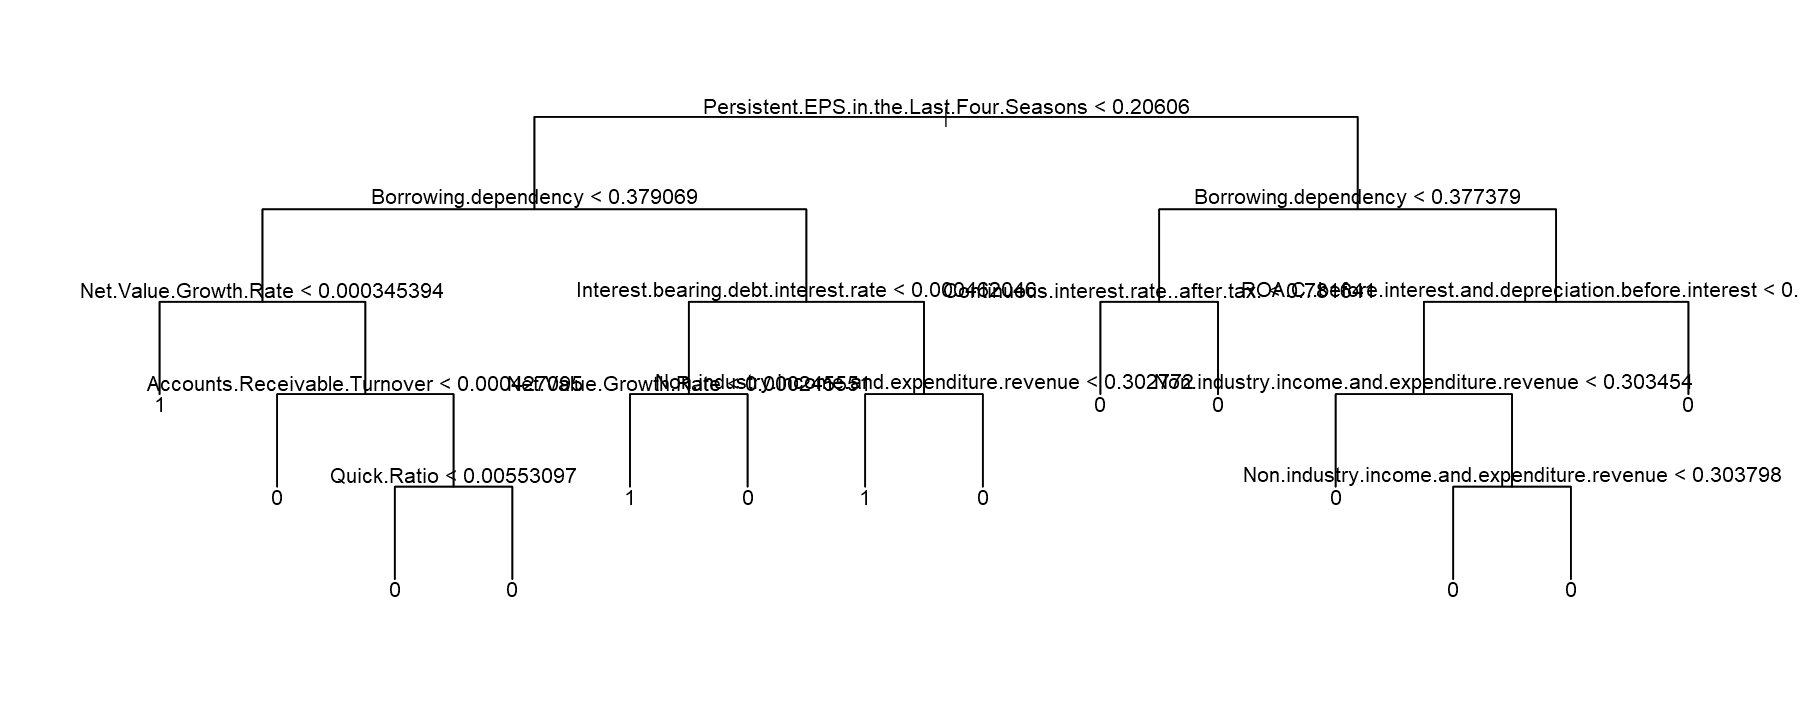

In [11]:
# Plot the classification tree
options(repr.plot.width=15, repr.plot.height=6)
plot(classtree, type='uniform')
text(classtree, pretty=0)

In [12]:
# Check the performance of the pruned tree
set.seed(1)  # Fixed 50:50 class
pred_tree <- predict(classtree, newdata=test, type='class')
pred_proba <- predict(classtree, newdata=test, type='vector')[, '1']

# Evaluation: confusion matrix
table(pred_tree, test$Bankrupt.)

# Accuracy
print(paste0('Accuracy = ', mean(pred_tree == test$Bankrupt.)))

# AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test$Bankrupt., pred_proba))))

         
pred_tree    0    1
        0 1318   34
        1    2   10

[1] "Accuracy = 0.973607038123167"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.862689393939394"


## SVC Classifier

In [15]:
library(e1071)  # SVM
# Fit Support Vector Classifier (SVM with linear kernel)
svc <- svm(bankr_formula, data=train, kernel='linear', cost=10, scale=F)

Warning message:
"package 'e1071' was built under R version 3.6.3"


In [16]:
# Make prediction using the best tuned model
pred_svc <- predict(svc, test)

# Evaluation
table(predict=pred_svc, truth=test$Bankrupt.)

       truth
predict   0   1
      0 724  29
      1 596  15

In [21]:
# Accuracy
print(paste0('Accuracy = ', mean(pred_svc == test$Bankrupt.)))

# AUC
print(paste0('AUC = ', 1 - pROC::auc(pROC::roc(as.numeric(test$Bankrupt.), as.numeric(pred_svc)))))

[1] "Accuracy = 0.541788856304985"


Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] "AUC = 0.55530303030303"
